# STOR 566, Homework 2
### Instructor: Yao Li
### Keywords: SVM, MLP, CNN
### Due date: Sep 18, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### **References:**

- You can follow the setup instructions at [here](https://pytorch.org/get-started/locally/).
- A useful tutorial on learning pytorch by examples at [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).
- More illustrations of different optimizers could be found [here](https://ruder.io/optimizing-gradient-descent/).
- Check Pytorch optimization methods at [here](https://pytorch.org/docs/stable/optim.html)
- Check Pytorch data augmentation options at [here](https://pytorch.org/vision/main/transforms.html).


### **Evaluation Metrics of Classifiers:**

- Average loss of an epoch: 
    \begin{align}
	  \frac{1}{B}\sum_{b=1}^B\sum_{d=1}^{D_b}\frac{loss(y_{bd}, f(x_{bd}))}{D_b}
	  \end{align}
    for each training epoch
    
    - $B$: the total number of batches
    - $D_b$: the number of observations in $b$-th batch
    - $f$: the model (Logistic regression or Linear SVM or MLP or CNN)
    - loss: logistic loss or the loss of linear SVM or cross-entropy
    - $(x_{bd}, y_{bd})$: the $d$-th pair of input data and label in $b$-th batch
    - An epoch is defined as one iteration over all observations in the training dataset

- Testing accuracy: 
	\begin{align}
	\frac{1}{N}\sum_{i=1}^N {\bf 1}(\hat{y}_i=y_i)
	\end{align}	
    - $N$: the total number of samples in the testing set
    - $y_i$: true label of sample $i$
    - $\hat{y}_i$: predicted label by the model

## Problem 1 (40 points)

In this problem you will practice implementing Linear SVM and Logistic Regression to classify **handwritten digit 0 and 1**.

**Data.** You will use MNIST digit classification dataset. Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. In this homework, you need two class, digit 0 and digit 1, for binary classification. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [1]:
## The following code can change the working directory to your google drive
## So you don't need to download the data every time
"""
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/YOUR_NEW_WD')
"""

"\nimport os\nfrom google.colab import drive \ndrive.mount('/content/drive')\nos.chdir('/content/drive/MyDrive/YOUR_NEW_WD')\n"

In [2]:
batch_size = 64
data_dir = './data'

import torch
from torchvision import models
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable

In [3]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))


subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

### **Problem Description.**
### 1. (20 points) Implement **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [4]:
## Implementation of Logistic Regression
## You can insert more code chunks and text cells if you want to.
## Your code:

## A template is provided but you don't have to follow it:
"""
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 10

# Training the Model
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 28*28) 
        # Convert labels from 0,1 to -1,1
        labels = 2*(labels.float()-0.5)
        
        ## TODO 
        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch
        # 3. Save batch loss

    ## Save average epoch loss
"""
input_size = 784  #(dimension of image 28 * 28)
num_classes = 1   
num_epochs = 10

class LogisticRegression(nn.modules.Module):    
    def __init__(self):
        super(LogisticRegression,self).__init__()
    def forward(self, outputs, labels):
        batch_size = outputs.size()[0]
        return torch.sum(torch.log(1 + torch.exp(-(outputs.t()*labels))))/batch_size


#Logistic regression model and Loss
logistics_model = 0
logistics_model = nn.Linear(input_size,num_classes)

## Custom Loss criteria and SGD optimizer
loss_criteria = LogisticRegression()

optimizer = torch.optim.SGD(logistics_model.parameters(), lr=0.01, momentum= 0.9)
total_step = len(train_loader)

In [5]:
templ = []
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0

    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)            
        labels = Variable(2*(labels.float()-0.5))
        
        outputs = logistics_model(images)               
        loss = loss_criteria(outputs, labels)    
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()   

        total_batches += 1     
        batch_loss += loss.item()

    avg_loss_epoch = batch_loss/total_batches
    templ.append(avg_loss_epoch)
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))

Epoch [1/10], Averge Loss:for epoch[1, 0.0128]
Epoch [2/10], Averge Loss:for epoch[2, 0.0039]
Epoch [3/10], Averge Loss:for epoch[3, 0.0030]
Epoch [4/10], Averge Loss:for epoch[4, 0.0025]
Epoch [5/10], Averge Loss:for epoch[5, 0.0022]
Epoch [6/10], Averge Loss:for epoch[6, 0.0020]
Epoch [7/10], Averge Loss:for epoch[7, 0.0018]
Epoch [8/10], Averge Loss:for epoch[8, 0.0017]
Epoch [9/10], Averge Loss:for epoch[9, 0.0015]
Epoch [10/10], Averge Loss:for epoch[10, 0.0015]


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

Answer: \
input_size = 784\
num_classes = 1\
num_epochs = 10\
batch_size = 64\
learning_rate = 0.01\
momentum = 0.9

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

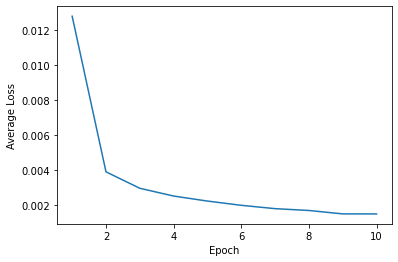

In [6]:
epoch_count = range(1, len(templ) + 1)
plt.plot(epoch_count, templ)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [7]:
correct = 0.
total = 0.
for images, labels in test_loader:
    images = images.reshape(-1, 28*28)

    outputs_test = torch.sigmoid(logistics_model(images))
    predicted = outputs_test.data >= 0.5 
 
    total += labels.size(0) 
    
    correct += (predicted.view(-1).long() == labels).sum()
    
   
print('Accuracy of the model on the test images: %f %%' % (100 * (correct.float() / total)))

Accuracy of the model on the test images: 99.905434 %


### 2. (20 points) Implement **Linear SVM** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [8]:
input_size = 784
num_classes = 1
num_epochs = 10
batch_size = 64
learning_rate = 0.0001
momentum = 0.01

class SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(SVM_Loss,self).__init__()
    def forward(self, outputs, labels):
         return torch.sum(torch.clamp(1 - outputs.t()*labels, min=0))/batch_size

#SVM regression model and Loss
svm_model = nn.Linear(input_size,num_classes)
#model = LogisticRegression(input_size,num_classes)

## Loss criteria and SGD optimizer
svm_loss_criteria = SVM_Loss()

#loss_criteria = nn.CrossEntropyLoss()  

svm_optimizer = torch.optim.SGD(svm_model.parameters(), lr=learning_rate, momentum=momentum)


#training
total_step = len(train_loader)
temp = []
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)                      
        labels = Variable(2*(labels.float()-0.5))
                
        # Forward pass        
        outputs = svm_model(images)           
        loss_svm = svm_loss_criteria(outputs, labels)    
        
       
        # Backward and optimize
        svm_optimizer.zero_grad()
        loss_svm.backward()
        svm_optimizer.step()    
        
        #print("Model's parameter after the update:")
        #for param2 in svm_model.parameters():
         #   print(param2)
        total_batches += 1     
        batch_loss += loss_svm.item()
    temp.append(batch_loss/total_batches) 

    avg_loss_epoch = batch_loss/total_batches
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))
        

Epoch [1/10], Averge Loss:for epoch[1, 0.2164]
Epoch [2/10], Averge Loss:for epoch[2, 0.0428]
Epoch [3/10], Averge Loss:for epoch[3, 0.0299]
Epoch [4/10], Averge Loss:for epoch[4, 0.0240]
Epoch [5/10], Averge Loss:for epoch[5, 0.0205]
Epoch [6/10], Averge Loss:for epoch[6, 0.0184]
Epoch [7/10], Averge Loss:for epoch[7, 0.0169]
Epoch [8/10], Averge Loss:for epoch[8, 0.0157]
Epoch [9/10], Averge Loss:for epoch[9, 0.0149]
Epoch [10/10], Averge Loss:for epoch[10, 0.0141]


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

Answer: \
input_size = 784\
num_classes = 1\
num_epochs = 10\
batch_size = 64\
learning_rate = 0.0001\
momentum = 0.01


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

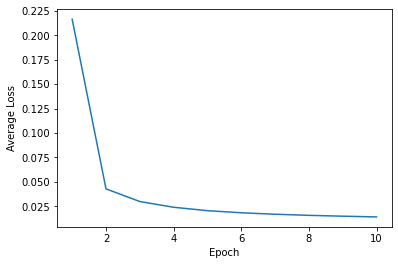

In [9]:
epoch_count = range(1, len(temp) + 1)
plt.plot(epoch_count, temp)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [10]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, 28 * 28)
    
    outputs = svm_model(images)    
    predicted = outputs.data >= 0
    total += labels.size(0) 
    correct += (predicted.view(-1).long() == labels).sum()    
 
print('Accuracy of the model on the test images: %f %%' % (100 * (correct.float() / total)))

Accuracy of the model on the test images: 99.905434 %


## Problem 2 (60 points)

In this problem you will practice implementing MLP and CNN to classify daily life images (CIFAR10).

**Data.** You will use CIFAR10 classification dataset (10 classes). Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [11]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size = 64
batch_size_cifar = 64
data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train_new = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test_new = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader_new = torch.utils.data.DataLoader(train_new, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader_new = torch.utils.data.DataLoader(test_new, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader_new, test_loader_new

train_loader_new, test_loader_new = cifar_loaders(batch_size_cifar)

Files already downloaded and verified


### **Problem Description.**
### 1. (20 points) Implement a 7 layers fully-connected neural networks with ReLU activation to do image classification. 

In [12]:
batch_size = 64
test_batch_size = 64
input_size = 3072

class SevenLayerFC_Net(nn.Module):
    def __init__(self, D_in,H,D_out):
        """
        In the constructor we instantiate three nn.Linear modules and assign them as
        member variables.
        """
        super(SevenLayerFC_Net, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, H)
        self.linear4 = torch.nn.Linear(H, H)
        self.linear5 = torch.nn.Linear(H, H)
        self.linear6 = torch.nn.Linear(H, H)
        self.linear7 = torch.nn.Linear(H, D_out)

        
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        x = F.relu(self.linear6(x))
        x = self.linear7(x)
        return F.log_softmax(x, dim=1)
      
      # N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = batch_size, input_size, 200, 10
num_epochs = 10



# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = SevenLayerFC_Net(D_in, H, D_out)
#print(model)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

temp7_layers = []

for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0

    for i, (images, labels) in enumerate(train_loader_new):
        # Reshape images to (batch_size, input_size)

        images = images.reshape(-1, 32*32*3)            

        #print(images.shape)
        outputs = model(images)

        loss = criterion(outputs, labels)    
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()   

        total_batches += 1     
        batch_loss += loss.item()

    temp7_layers.append(batch_loss/total_batches)

    avg_loss_epoch = batch_loss/total_batches
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))

Epoch [1/10], Averge Loss:for epoch[1, 2.0839]
Epoch [2/10], Averge Loss:for epoch[2, 1.7891]
Epoch [3/10], Averge Loss:for epoch[3, 1.6687]
Epoch [4/10], Averge Loss:for epoch[4, 1.6051]
Epoch [5/10], Averge Loss:for epoch[5, 1.5514]
Epoch [6/10], Averge Loss:for epoch[6, 1.5209]
Epoch [7/10], Averge Loss:for epoch[7, 1.4918]
Epoch [8/10], Averge Loss:for epoch[8, 1.4703]
Epoch [9/10], Averge Loss:for epoch[9, 1.4481]
Epoch [10/10], Averge Loss:for epoch[10, 1.4335]


### (a) (5 points) Print the model architecture.

In [13]:
print(model)

SevenLayerFC_Net(
  (linear1): Linear(in_features=3072, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=200, bias=True)
  (linear4): Linear(in_features=200, out_features=200, bias=True)
  (linear5): Linear(in_features=200, out_features=200, bias=True)
  (linear6): Linear(in_features=200, out_features=200, bias=True)
  (linear7): Linear(in_features=200, out_features=10, bias=True)
)


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

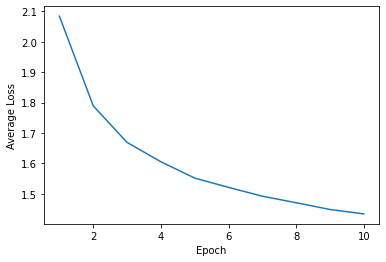

In [14]:
epoch_count = range(1, len(temp7_layers) + 1)
plt.plot(epoch_count, temp7_layers)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [15]:
correct = 0.
total = 0.
for images, labels in test_loader_new:
    images = images.reshape(-1, 3*32*32)
    outputs_test = model(images)
    _, predicted = torch.max(outputs_test.data, 1)
    total += labels.size(0) 
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (     100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


### 2. (30 points) Implement a 7 layers CNN with 4 convolutional layers, 3 fully-connected layers and ReLU activation function. The input dimension of the 1st fully-connected layer must be 4096.

In [16]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size = 64
batch_size_cifar = 64
data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train_new = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test_new = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader_new = torch.utils.data.DataLoader(train_new, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader_new = torch.utils.data.DataLoader(test_new, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader_new, test_loader_new

train_loader_new, test_loader_new = cifar_loaders(batch_size_cifar)

Files already downloaded and verified


In [31]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size = 64
test_batch_size = 64
input_size = 32*32*3

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3), padding=(1,1))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=(3,3), padding=(1,1))
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=(3,3), padding=(1,1))
        self.conv4 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=(3,3), padding=(1,1))
        self.pool = nn.MaxPool2d(2,2)
        self.fc8 = nn.Linear(in_features=8*8*48, out_features=512)
        self.fc9 = nn.Linear(in_features=512, out_features=64)
        self.fc10 = nn.Linear(in_features=64, out_features=10)

        
    def forward(self, x):
        x = F.relu(self.conv1(x)) #32*32*6
        x = F.relu(self.conv2(x)) #32*32*12
        x = self.pool(x) #16*16*12
        x = F.relu(self.conv3(x)) #16*16*24
        x = F.relu(self.conv4(x)) #16*16*48
        x = self.pool(x) # 8*8*48
        x = x.view(x.size(0), -1) # reshape x
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = self.fc10(x)
        return F.log_softmax(x, dim=1)

In [ ]:
#training
num_epochs = 20
net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer_new = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
temp_cnn1_layers = []
for epoch in range(num_epochs):
    avg_loss_epoch_new = 0
    batch_loss_new = 0
    total_batches_new = 0

    for i, (input_data, classes) in enumerate (train_loader_new,0):
        optimizer_new.zero_grad() # every time reset the parameter gradients to zero
        # forward backward optimize
        output_new = net(input_data)
        loss_new = criterion(output_new, classes)
        loss_new.backward()
        optimizer_new.step()
        # print the loss
        total_batches_new += 1     
        batch_loss_new += loss_new.item()

    avg_loss_epoch_new = batch_loss_new/total_batches_new
    temp_cnn1_layers.append(avg_loss_epoch_new)
        # print the loss after every epoch
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch_new ))

Epoch [1/20], Averge Loss:for epoch[1, 1.9534]
Epoch [2/20], Averge Loss:for epoch[2, 1.5004]
Epoch [3/20], Averge Loss:for epoch[3, 1.2677]
Epoch [4/20], Averge Loss:for epoch[4, 1.1251]
Epoch [5/20], Averge Loss:for epoch[5, 1.0115]
Epoch [6/20], Averge Loss:for epoch[6, 0.9388]
Epoch [7/20], Averge Loss:for epoch[7, 0.8643]
Epoch [8/20], Averge Loss:for epoch[8, 0.8305]
Epoch [9/20], Averge Loss:for epoch[9, 0.7854]
Epoch [10/20], Averge Loss:for epoch[10, 0.7570]
Epoch [11/20], Averge Loss:for epoch[11, 0.7251]
Epoch [12/20], Averge Loss:for epoch[12, 0.7053]
Epoch [13/20], Averge Loss:for epoch[13, 0.6846]
Epoch [14/20], Averge Loss:for epoch[14, 0.6603]
Epoch [15/20], Averge Loss:for epoch[15, 0.6486]
Epoch [16/20], Averge Loss:for epoch[16, 0.6273]
Epoch [17/20], Averge Loss:for epoch[17, 0.6272]


### (a) (5 points) Print the model architecture.

In [28]:
print(net)

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc8): Linear(in_features=3072, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=64, bias=True)
  (fc10): Linear(in_features=64, out_features=10, bias=True)
)


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

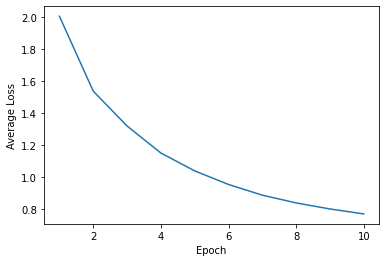

In [24]:
epoch_count = range(1, len(temp_cnn1_layers) + 1)
plt.plot(epoch_count, temp_cnn1_layers)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [ ]:
net.eval()
correct = 0
total = 0
for data in test_loader_new:
    input_data, classes = data
    output_new = net(input_data)
    _, predicted = torch.max(output_new.data, 1)
    total += classes.size(0)
    correct += (predicted == classes).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (     100 * correct / total))

In [30]:
objects = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader_new:
        input_data, classes = data
        output_new = net(input_data)
        _, predicted = torch.max(output_new, 1)
        c = (predicted == classes).squeeze()
        for i in range(4):
            label = classes[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        objects[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 50 %
Accuracy of   car : 56 %
Accuracy of  bird : 13 %
Accuracy of   cat : 26 %
Accuracy of  deer :  3 %
Accuracy of   dog : 57 %
Accuracy of  frog : 53 %
Accuracy of horse : 62 %
Accuracy of  ship : 67 %
Accuracy of truck : 50 %


### (d) (10 points) Write a new cifar$\_$loaders function to try different data augmentation methods.

In [22]:
batch_size = 64
batch_size_cifar = 64
data_dir = './data'
brightness = 0.5
def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train_star = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(brightness = [max(0, 1 - brightness), 1 + brightness]),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test_star = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader_star = torch.utils.data.DataLoader(train_star, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader_star = torch.utils.data.DataLoader(test_star, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader_star, test_loader_star

train_loader_star, test_loader_star = cifar_loaders(batch_size_cifar)

Files already downloaded and verified


Answer: I add a brightness change in data argmentation.

### 3. (10 points) Please compare the results of the two models (MLP and CNN).

Answer: By comparing the loss and accuracy of MLP and CNN, we can see that the CNN model has low loss and higher accuracy but the difference is not very large. Hence, if we want higher accuracy and lower loss, we need to improve my CNN architecture. 